### 0_Data load & Standardization

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn import preprocessing
import mglearn
brt_cancer = load_breast_cancer()

In [3]:
#데이터셋을 데이터프레임화
df = pd.DataFrame(brt_cancer.data, columns=brt_cancer.feature_names)
df=df[['mean radius','mean texture']]
df.head()

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [4]:
#데이터 정규화
scaler = preprocessing.StandardScaler()
x_df=df[['mean radius','mean texture']]
scaler.fit(x_df)
scaled_ar = scaler.transform(x_df)
scaled_df=pd.DataFrame(scaled_ar,columns=x_df.columns)

#class label 달기
scaled_df['diagnosis']=pd.DataFrame(brt_cancer.target)

In [5]:
scaled_df.head()

,mean radius,mean texture,diagnosis
0,1.097064,-2.073335,0
1,1.829821,-0.353632,0
2,1.579888,0.456187,0
3,-0.768909,0.253732,0
4,1.750297,-1.151816,0


In [6]:
from sklearn.model_selection import train_test_split
X = scaled_ar
y = scaled_df['diagnosis'].values
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(len(X_train), len(X_test), len(y_train), len(y_test))

(569, 2)
398 171 398 171


### 1_Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, oob_score=True, random_state=0)

rf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [8]:
rf.score(X_train,y_train)

print("Train R2: ",rf.score(X_train,y_train))
print("Test R2: ",rf.score(X_test,y_test))

Train R2:  0.9899497487437185
Test R2:  0.8654970760233918


### 2_KNN Classifier

In [10]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
#그래프를 통한 k 값 튜닝 - 22로 rough 결정
accuracy = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_pred = knn.predict(X_test)
    accuracy.append(np.mean(np.array(y_test).astype(np.int32)== test_pred))

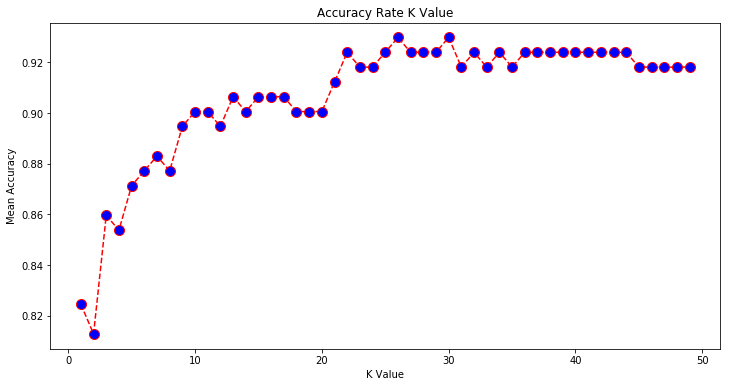

In [11]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), accuracy, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Accuracy')  
plt.show()

In [12]:
from sklearn.neighbors import KNeighborsClassifier

accuracy = []
error = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=22)
    knn.fit(X_train, y_train)
    test_pred = knn.predict(X_test)
    accuracy.append(np.mean(np.array(y_test).astype(np.int32)== test_pred))
    error.append(np.mean(test_pred != y_test))

In [13]:
knn.score(X_train,y_train)

print("Train R2: ",knn.score(X_train,y_train))
print("Test R2: ",knn.score(X_test,y_test))

Train R2:  0.9020100502512562
Test R2:  0.9239766081871345


### 1_1 ROC Curve of Random Forest

In [14]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [15]:
#keep probabilities for the positive outcome only
probs = rf.predict_proba(X_test)
y_score = probs[:, 1] # 0,1 중 1로 분류될 확률

In [16]:
# calculate AUC
roc_auc = roc_auc_score(y_test, y_score)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

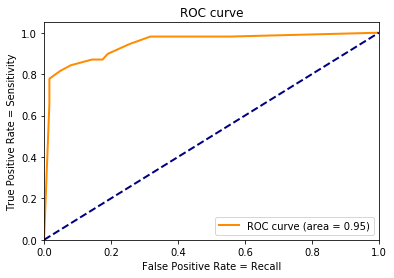

In [17]:
plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

### 2_1 ROC Curve of KNN

In [18]:
#keep probabilities for the positive outcome only
probs = knn.predict_proba(X_test)
y_score = probs[:, 1] # 0,1 중 1로 분류될 확률
# calculate AUC
roc_auc = roc_auc_score(y_test, y_score)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

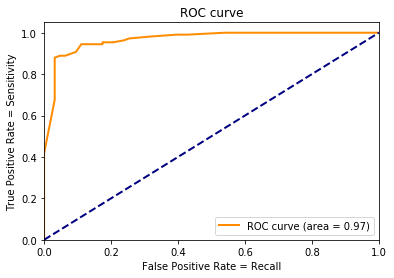

In [19]:
plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### - ROC Curve로 비교하였을 때 KNN 모델이 왼쪽 위 코너로 붙어 더 예측력이 좋은 모델임을 확인할 수 있다. PR Curve는 데이터 라벨의 분포가 불균등하지 않으므로 확인하지 않는다.

### 3_Grid Search with Cross Validation

In [20]:
# 시험할 파라미터 지정
param_grid = {'n_neighbors':range(15,30), 'weights': ['uniform','distance'],
             'leaf_size':[20,30,40],'metric':['euclidean','manhattan','minkowski']}

In [21]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5) 
grid_search.fit(X, y)

print('최적의 파라미터: ', grid_search.best_params_)
print('최고 성능 모델: ', grid_search.best_estimator_)
print('최고 교차검증 점수: {:.2f}'.format(grid_search.best_score_))

최적의 파라미터:  {'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'uniform'}
최고 성능 모델:  KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')
최고 교차검증 점수: 0.91


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [22]:
# DF화하여 결과 확인
pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)

#test score 높은 순으로 확인
results.sort_values(by=['mean_test_score'],inplace=True)

display(np.transpose(results.head()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

,61,1,95,5,65
mean_fit_time,0.000999212,0.00139756,0.000798512,0.000598717,0.00119743
std_fit_time,1.95078e-05,0.000488267,0.000399262,0.000488851,0.000398708
mean_score_time,0.00200071,0.00299025,0.00239072,0.00179338,0.00219316
std_score_time,2.56375e-05,0.000892605,0.000488059,0.000397812,0.000399258
param_leaf_size,20,20,30,20,20
param_metric,minkowski,euclidean,euclidean,euclidean,minkowski
param_n_neighbors,15,15,17,17,17
param_weights,distance,distance,distance,distance,distance
params,"{'leaf_size': 20, 'metric': 'minkowski', 'n_ne...","{'leaf_size': 20, 'metric': 'euclidean', 'n_ne...","{'leaf_size': 30, 'metric': 'euclidean', 'n_ne...","{'leaf_size': 20, 'metric': 'euclidean', 'n_ne...","{'leaf_size': 20, 'metric': 'minkowski', 'n_ne..."
split0_test_score,0.843478,0.843478,0.843478,0.843478,0.843478


### 5_KNN 튜닝

In [23]:
knn2 = KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='manhattan',
       metric_params=None, n_jobs=None, n_neighbors=25, p=2,
       weights='uniform')
knn2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')

In [24]:
knn.score(X_train,y_train)

print("Train R2: ",knn2.score(X_train,y_train))
print("Test R2: ",knn2.score(X_test,y_test))

Train R2:  0.8969849246231156
Test R2:  0.9239766081871345


#### - Grid search를 통한 튜닝을 통해 Test R2는 유지하면서도 Train R2를 0.01가량 줄여 Overfitting을 완화하였다.